# Maze Visualization Demo

This notebook demonstrates the visualization capabilities of the maze runner game using the visualization utilities from the project.

In [1]:
import sys
import pygame
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import our maze game modules
from src.maze import create_maze
from src.visualization import visualize_maze, JupyterExplorer
from src.explorer import Explorer
from src.constants import WINDOW_SIZE

pygame 2.5.2 (SDL 2.28.2, Python 3.12.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


## Initialize Pygame for Jupyter

We need to initialize Pygame in a way that works with Jupyter notebooks.

In [2]:
# Initialize Pygame
pygame.init()
screen = pygame.display.set_mode((WINDOW_SIZE, WINDOW_SIZE))
pygame.display.set_caption("Maze Explorer - Jupyter Visualization")

## Create and Visualize a Random Maze

Let's create a random maze and visualize it using the visualization utilities.

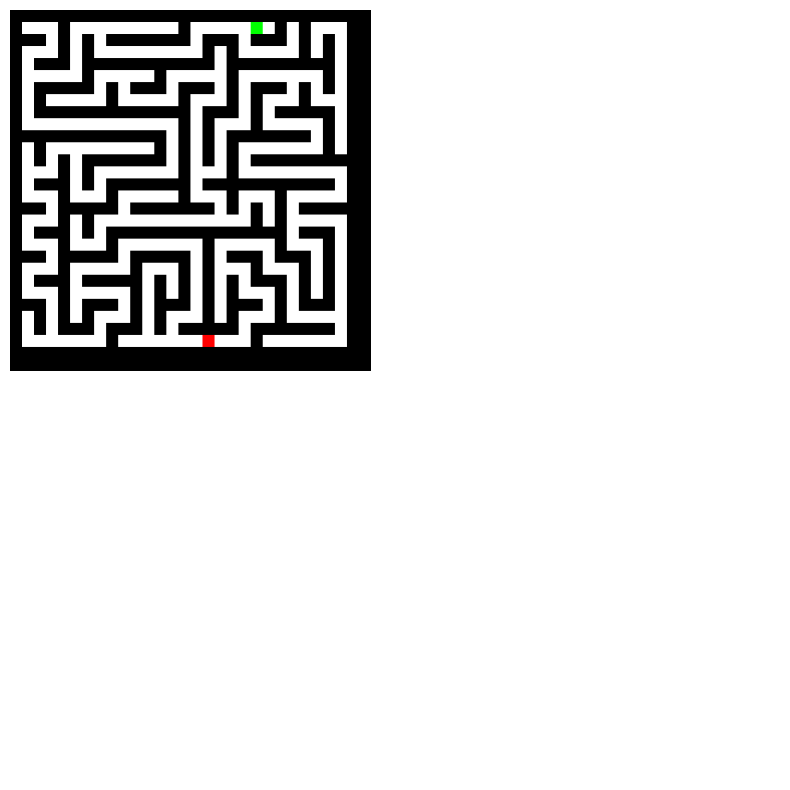

In [3]:
# Create and visualize a random maze
maze = create_maze(30, 30, "random")
visualize_maze(maze, screen)

## Animated Maze Solving

Let's use the JupyterExplorer to solve the maze with animation.

In [4]:
# Create maze and explorer
maze = create_maze(30, 30, "random")
explorer = JupyterExplorer(maze, screen)

# Run the explorer
time_taken, moves = explorer.solve()
print(f"Maze solved in {time_taken:.2f} seconds")
print(f"Number of moves: {len(moves)}")


=== Maze Exploration Statistics ===
Total time taken: 100.86 seconds
Total moves made: 558
Number of backtrack operations: 0
Average moves per second: 5.53

Maze solved in 100.86 seconds
Number of moves: 558


## Compare Different Maze Types

Let's compare the visualization of random and static mazes.

Random Maze:


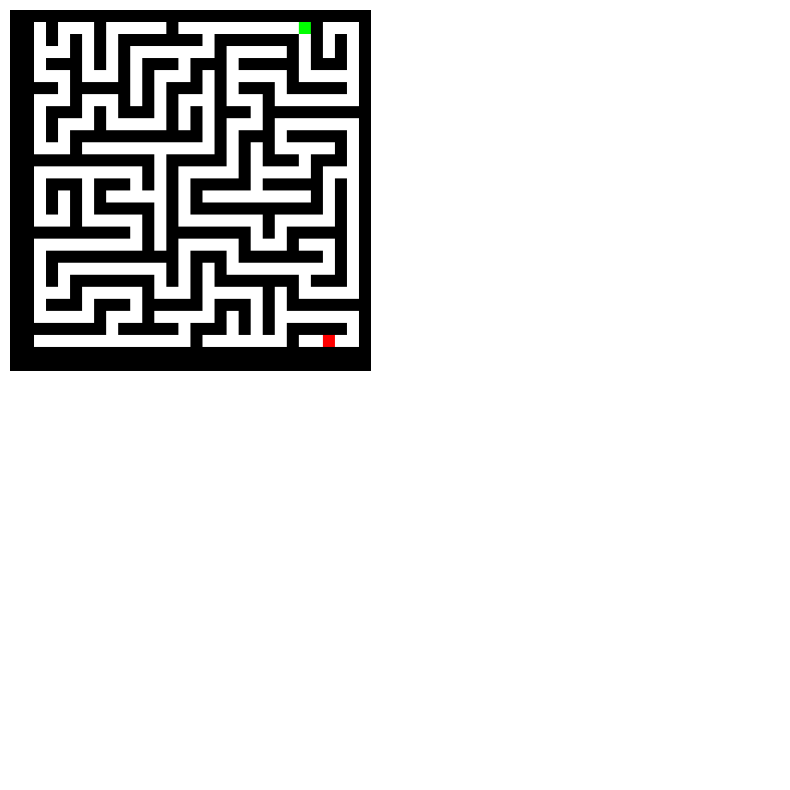

Static Maze:


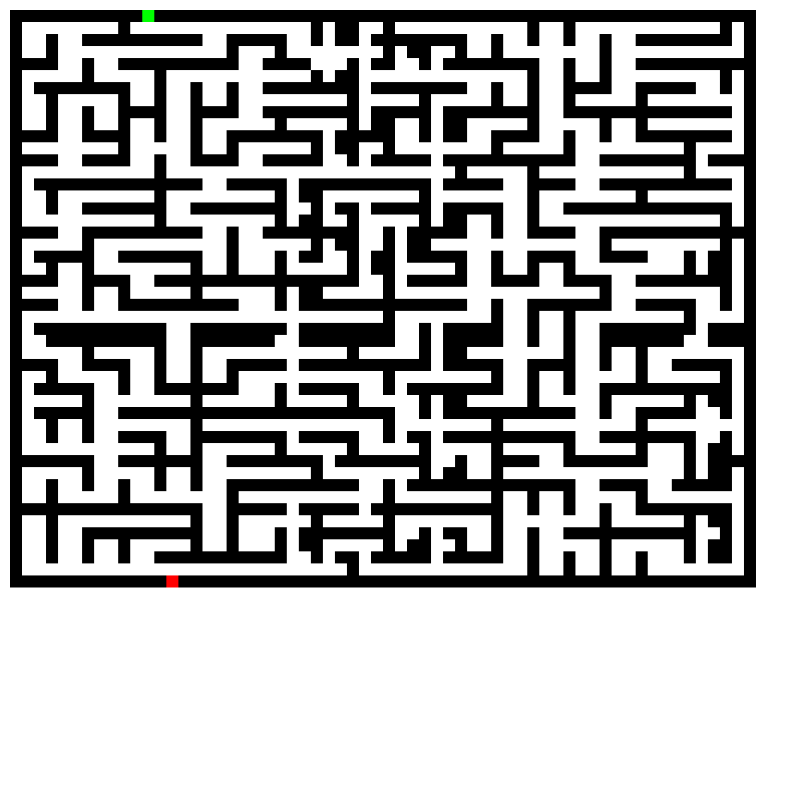

In [5]:
# To fix the error: display Surface quit
# Safely reinitialize Pygame
pygame.quit() # Close the previous Pygame window
pygame.init() # Reinitialize the screen

# Create a new screen
screen = pygame.display.set_mode((WINDOW_SIZE, WINDOW_SIZE))
pygame.display.set_caption("Maze Explorer - Jupyter Visualization")

# Create and visualize a random maze
random_maze = create_maze(30, 30, "random")
print("Random Maze:")
visualize_maze(random_maze, screen)

# Create and visualize a static maze
static_maze = create_maze(30, 30, "static")
print("Static Maze:")
visualize_maze(static_maze, screen)

## Performance Analysis

Let's analyze the performance of the automated explorer on different maze types (without visualization: visualize = False)

In [6]:
def run_exploration(maze_type, width, height):
    maze = create_maze(width, height, maze_type)
    explorer = Explorer(maze, visualize=False)
    start_time = time.time()
    time_taken, moves = explorer.solve()
    return {
        'maze_type': maze_type,
        'time_taken': time_taken,
        'moves': len(moves),
        'moves_per_second': len(moves) / time_taken
    }

# Run multiple explorations
results = []
for maze_type in ['random', 'static']:
    for _ in range(3):  # Run each type 3 times
        result = run_exploration(maze_type, 30, 30)
        results.append(result)
print("Simulation Done")
# Display results
df = pd.DataFrame(results)
print("Exploration Results:")
print(df.groupby('maze_type').mean())


=== Maze Exploration Statistics ===
Total time taken: 0.00 seconds
Total moves made: 219
Number of backtrack operations: 0
Average moves per second: 910359.34


=== Maze Exploration Statistics ===
Total time taken: 0.00 seconds
Total moves made: 687
Number of backtrack operations: 0
Average moves per second: 1054331.08


=== Maze Exploration Statistics ===
Total time taken: 0.00 seconds
Total moves made: 99
Number of backtrack operations: 0
Average moves per second: 1128358.96


=== Maze Exploration Statistics ===
Total time taken: 0.00 seconds
Total moves made: 1279
Number of backtrack operations: 0
Average moves per second: 939001.37


=== Maze Exploration Statistics ===
Total time taken: 0.00 seconds
Total moves made: 1279
Number of backtrack operations: 0
Average moves per second: 1202266.88


=== Maze Exploration Statistics ===
Total time taken: 0.00 seconds
Total moves made: 1279
Number of backtrack operations: 0
Average moves per second: 1143575.96

Simulation Done
Exploration 

## Performance Analysis

Let's analyze the performance of the automated explorer on different maze types (with visualization: visualize = True)

In [7]:
def run_exploration(maze_type, width, height):
    maze = create_maze(width, height, maze_type)
    explorer = Explorer(maze, visualize=True)
    start_time = time.time()
    time_taken, moves = explorer.solve()
    return {
        'maze_type': maze_type,
        'time_taken': time_taken,
        'moves': len(moves),
        'moves_per_second': len(moves) / time_taken
    }

# Run multiple explorations
results = []
for maze_type in ['random', 'static']:
    for _ in range(3):  # Run each type 3 times
        result = run_exploration(maze_type, 30, 30)
        results.append(result)
print("Simulation Done")
# Display results
df = pd.DataFrame(results)
print("Exploration Results:")
print(df.groupby('maze_type').mean())


=== Maze Exploration Statistics ===
Total time taken: 4.63 seconds
Total moves made: 139
Number of backtrack operations: 0
Average moves per second: 30.00


=== Maze Exploration Statistics ===
Total time taken: 11.55 seconds
Total moves made: 348
Number of backtrack operations: 0
Average moves per second: 30.14


=== Maze Exploration Statistics ===
Total time taken: 5.73 seconds
Total moves made: 172
Number of backtrack operations: 0
Average moves per second: 30.04


=== Maze Exploration Statistics ===
Total time taken: 42.34 seconds
Total moves made: 1279
Number of backtrack operations: 0
Average moves per second: 30.21


=== Maze Exploration Statistics ===
Total time taken: 42.34 seconds
Total moves made: 1279
Number of backtrack operations: 0
Average moves per second: 30.21


=== Maze Exploration Statistics ===
Total time taken: 42.36 seconds
Total moves made: 1279
Number of backtrack operations: 0
Average moves per second: 30.19

Simulation Done
Exploration Results:
           tim

## Visualizing Improvements of the BFS explorer and A* explorer (unsuccessful attempt)

In [17]:
from src.explorer import Explorer           # original wall‑follower
from src.explorer_bfs import BFSExplorer    # BFS shortest‑path
from src.explorer_aStar import AStarExplorer# A* heuristic
from src.maze import create_maze
from src.jupyter_bfs_explorer import JupyterBFSExplorer
from src.jupyter_astar_explorer import JupyterAStarExplorer
import pygame

In [18]:
# Initialize Pygame display
pygame.init()
screen = pygame.display.set_mode((WINDOW_SIZE, WINDOW_SIZE))
pygame.display.set_caption("Maze Explorer - Jupyter Visualization")

# Create maze and explorer
maze = create_maze(30, 30, "random")
explorer = JupyterExplorer(maze, screen)

# Run the explorer
time_taken, moves = explorer.solve()
print(f"Maze solved in {time_taken:.2f} seconds")
print(f"Number of moves: {len(moves)}")



=== Maze Exploration Statistics ===
Total time taken: 97.47 seconds
Total moves made: 540
Number of backtrack operations: 0
Average moves per second: 5.54

Maze solved in 97.47 seconds
Number of moves: 540


In [27]:
# To fix the error: display Surface quit
# Safely reinitialize Pygame
pygame.quit() # Close the previous Pygame window
pygame.init() # Reinitialize the screen

# Create a new screen
screen = pygame.display.set_mode((WINDOW_SIZE, WINDOW_SIZE))
pygame.display.set_caption("Maze Explorer - Jupyter Visualization")

# For BFS visualization
maze = create_maze(30, 30, "random")
explorer = JupyterBFSExplorer(maze, screen)
print(f"BFS Explorer: Maze solved in {time_taken:.2f} seconds")
print(f"Number of moves: {len(moves)}")

BFS Explorer: Maze solved in 97.47 seconds
Number of moves: 540


In [24]:
# To fix the error: display Surface quit
# Safely reinitialize Pygame
pygame.quit() # Close the previous Pygame window
pygame.init() # Reinitialize the screen

# Create a new screen
screen = pygame.display.set_mode((WINDOW_SIZE, WINDOW_SIZE))
pygame.display.set_caption("Maze Explorer - Jupyter Visualization")

# For A* visualization
maze = create_maze(30, 30, "random")
explorer = JupyterAStarExplorer(maze, screen)
print(f"A* Explorer: Maze solved in {time_taken:.2f} seconds")
print(f"Number of moves: {len(moves)}")

A* Explorer: Maze solved in 97.47 seconds
Number of moves: 540
